# Visão Computacional - Lista 8

Aqui serão resolvidas as atividades da terceira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1 - Contando Palitos

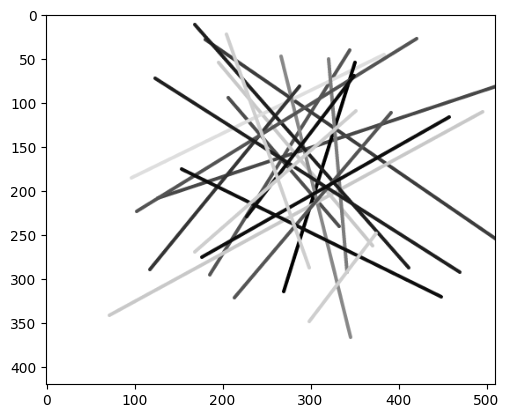

In [2]:
palitos = cv2.imread('./jogo-dos-palitos.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(palitos, cmap='gray')
plt.show()

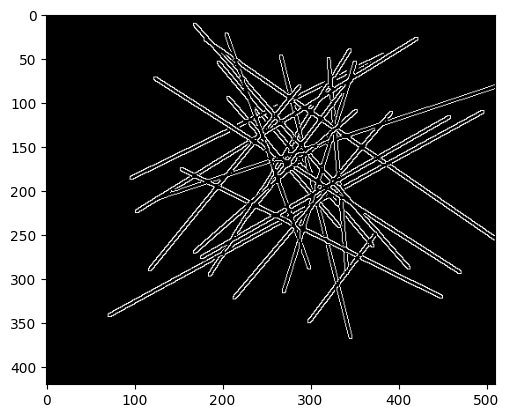

In [3]:
corner_palitos = cv2.Canny(palitos, 50, 150, apertureSize=7)
plt.imshow(corner_palitos, cmap='gray')
plt.show()

In [4]:
def hough_transform(image: np.ndarray, rho_res=180, theta_res=180):
    lins, cols = image.shape[0:2]

    max_rho = int(np.sqrt(lins**2 + cols**2))

    rhos = np.linspace(-max_rho, max_rho, rho_res)
    thetas = np.linspace(-np.pi / 2, np.pi / 2, theta_res)
    
    accumulator = np.zeros((rho_res, theta_res), dtype=int)

    edge_points = np.argwhere(image)
    
    for y, x in edge_points:
        for theta_idx, theta in enumerate(thetas):
            rho = x * np.cos(theta) + y * np.sin(theta)
            rho_idx = np.argmin(np.abs(rhos - rho))
            accumulator[rho_idx, theta_idx] += 1

    return accumulator, rhos, thetas

In [5]:
accumulator, rhos, thetas = hough_transform(corner_palitos, 180, 180)
# Detectar picos no acumulador
line_indices = np.argwhere(accumulator > np.max(accumulator) * 0.65)
num_lines = len(line_indices)
print(num_lines//2)

16


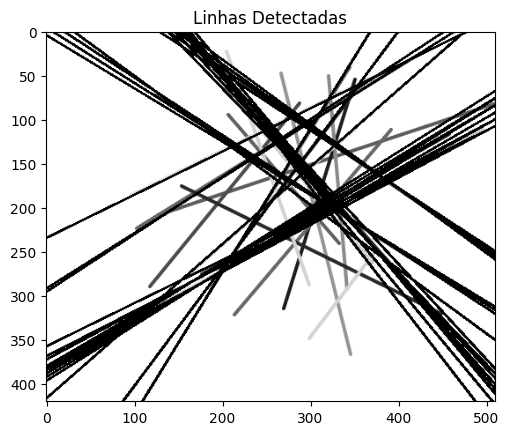

In [6]:
for rho_idx, theta_idx in line_indices:
    rho = rhos[rho_idx]
    theta = thetas[theta_idx]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(palitos, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(palitos, cv2.COLOR_BGR2RGB))
plt.title("Linhas Detectadas")
plt.show()

# 2 - Contando Hemácias

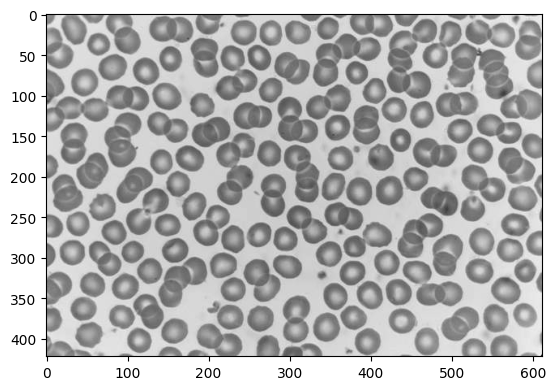

In [7]:
hemaceas = cv2.imread('./Hemacias.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(hemaceas, cmap='gray')
plt.show()

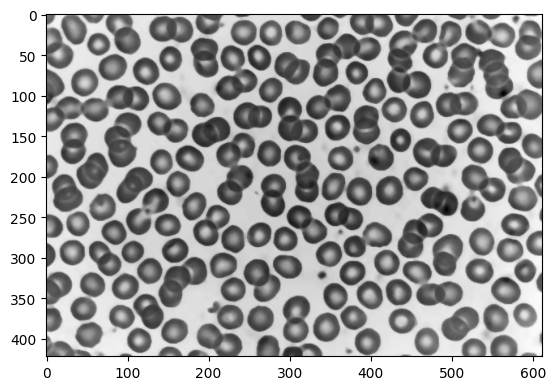

In [8]:
hemaceas = cv2.medianBlur(hemaceas, 5)
plt.imshow(hemaceas, cmap='gray')
plt.show()

In [9]:
circulos = cv2.HoughCircles(hemaceas, cv2.HOUGH_GRADIENT, dp=1.2, minDist=10, param1=50, param2=30, minRadius=10, maxRadius=30)

circulos = np.round(circulos[0, :]).astype("int")
print(len(circulos))

200


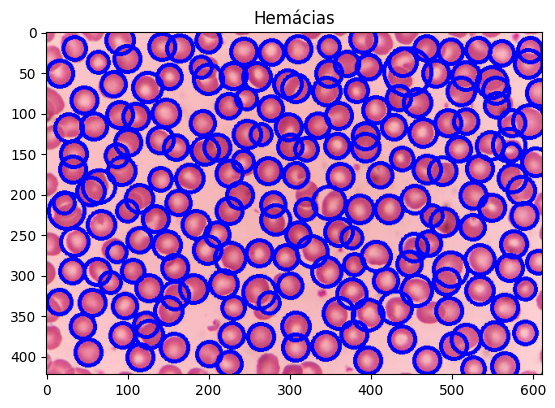

In [10]:
hemaceas_2 = cv2.imread('./Hemacias.jpg')

for (x, y, r) in circulos:
    cv2.circle(hemaceas_2, (x, y), r, (255, 0, 0), 3)
plt.imshow(hemaceas_2[:,:,::-1])
plt.title("Hemácias")
plt.show()

# 3 - Implementação Sinograma

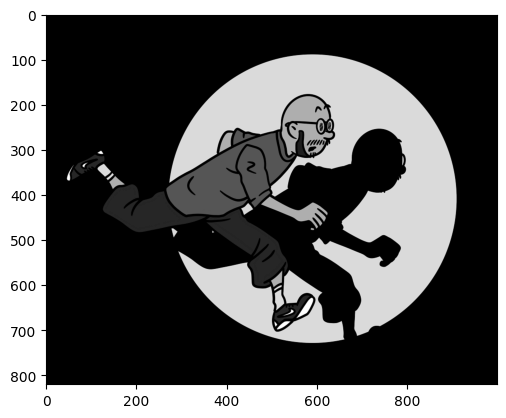

In [11]:
tintin = cv2.imread('./baldtin1000pb.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(tintin, cmap='gray')
plt.show()

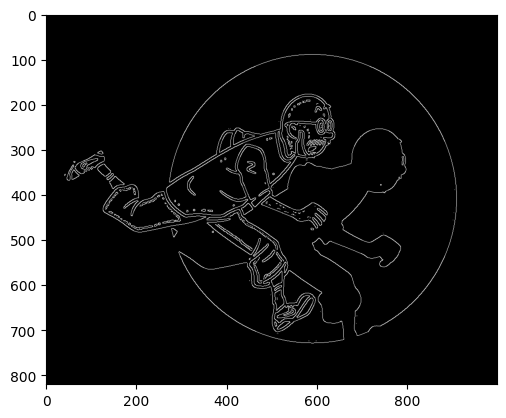

In [12]:
tintin_corner = cv2.Canny(tintin, 50, 150, apertureSize=7)
plt.imshow(tintin_corner, cmap='gray')
plt.show()

In [13]:
def hough_transform_sinusoidal(image, theta_res=100, rho_res=82):
    lins, cols = image.shape[:2]

    max_rho = int(np.sqrt(lins**2 + cols**2))
    thetas = np.linspace(0, np.pi, theta_res)
    rhos = np.linspace(-max_rho, max_rho, rho_res)
    
    # rhos = np.linspace(0, 820, rho_res)

    accumulator = np.zeros((rho_res, theta_res), dtype=int)
    
    for y in range(lins):
        for x in range(cols):
            if image[y, x] > 0:
                for theta_idx, theta in enumerate(thetas):
                    rho = x * np.cos(theta) + y * np.sin(theta)
                    rho_idx = np.argmin(np.abs(rhos - rho))
                    accumulator[rho_idx, theta_idx] += image[y, x]

    return accumulator, rhos, thetas

In [14]:
accumulator, rhos, thetas = hough_transform_sinusoidal(tintin, theta_res=100, rho_res=82)

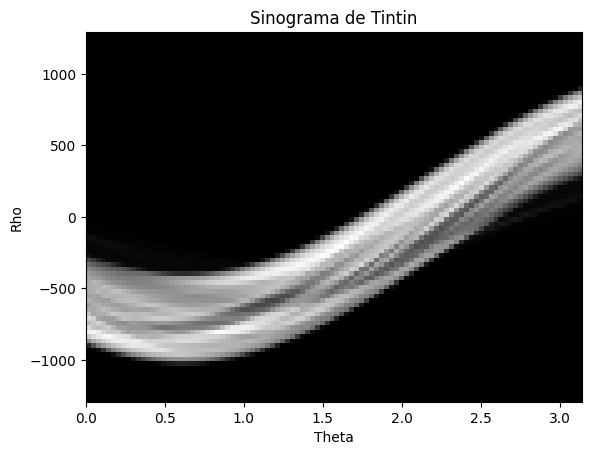

In [15]:
plt.imshow(accumulator, cmap='gray', aspect='auto', extent=[0, np.pi, rhos[0], rhos[-1]])
plt.xlabel('Theta')
plt.ylabel('Rho')
plt.title('Sinograma de Tintin')
plt.show()

# 4 - Sinograma

Sabemos que $I(x,y)$, onde $(x(\theta,\rho),y(\theta,\rho))=(\rho \cos(\theta)- s \sin(\theta), \rho \sin(\theta)+ s \cos(\theta))$, e $s$ é a parametrização da linha projetada,

Assim, ao integrar ao longo da linha parametrizada no parâmetro $s$, chegamos que:
$$S(\theta, \rho)=\int_{\R^2}I(\rho \cos(\theta)- s \sin(\theta), \rho \sin(\theta)+ s \cos(\theta))ds$$